<a href="https://colab.research.google.com/github/simoneCanto/Desafio-6-DNC/blob/main/Desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Desafio 6 DNC

# Aluna:Simone Tatiane do Canto

In [23]:
#!pip install scikit-learn
#!pip install --upgrade scikit-learn

In [24]:
#Bibiotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter(action='ignore')


#Etapa 01) Análise exploratória dos dados (Data Understanding)


In [25]:
# a. Carregue a base de dados;

streaming = pd.read_csv('/content/streaming_data.csv')
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [26]:
#b. Realize uma descrição estatística dos dados;

streaming.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [28]:
# c. Verifique os tipos de dados

streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [29]:
#d. Verifique a quantidade de valores faltantes

streaming.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

Text(0.5, 1.0, 'Quantidade de dados faltantes')

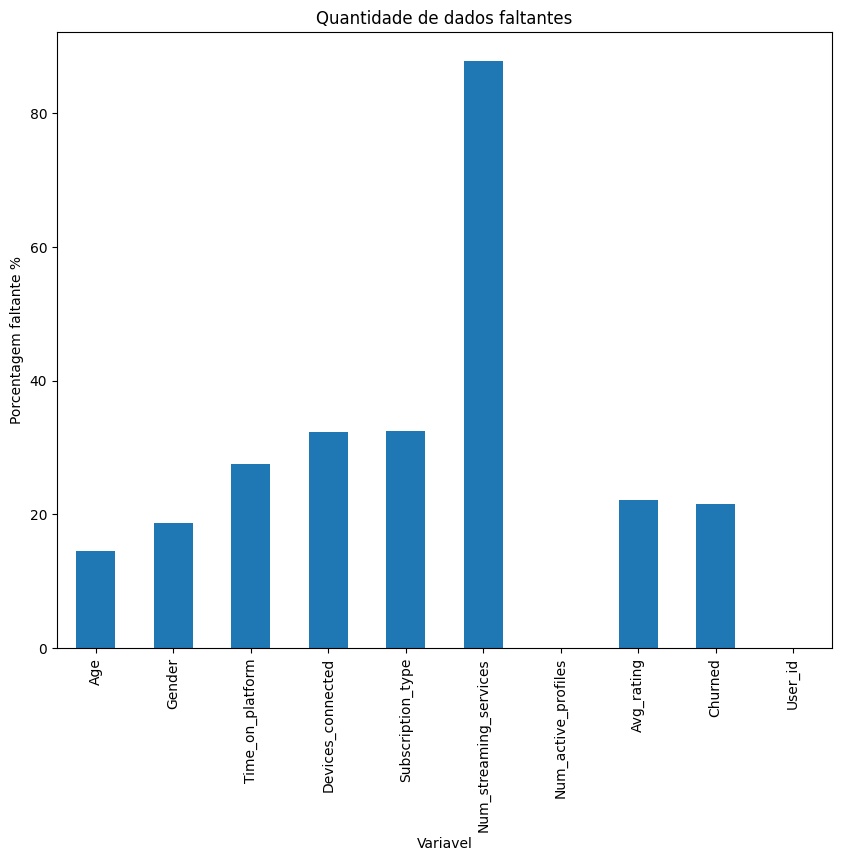

In [30]:
(streaming.isnull().mean()*100).plot.bar(figsize=(10,8))
plt.ylabel('Porcentagem faltante %')
plt.xlabel('Variavel')
plt.title('Quantidade de dados faltantes')

In [31]:
#Classificação de assinatura
streaming_calc = streaming.groupby('Subscription_type')['User_id'].count().reset_index()
streaming_calc = pd.DataFrame(streaming_calc)
streaming_calc

,Subscription_type,User_id
0,Basic,17527
1,Premium,17625
2,Standard,17511


Text(0.5, 1.0, 'Tipos de assinaturas')

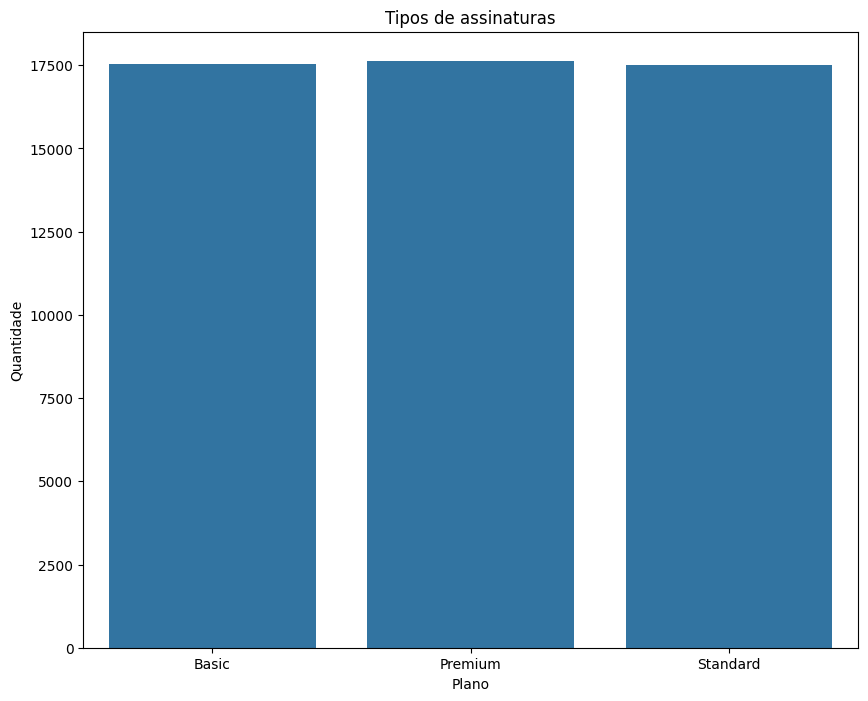

In [32]:
#Quantidade de assinaturas

plt.figure(figsize=[10,8])
sns.barplot(data=streaming_calc, x='Subscription_type', y='User_id')
plt.ylabel('Quantidade')
plt.xlabel('Plano')
plt.title('Tipos de assinaturas')

In [33]:
#Classificação de assinatura

streaming_gender = streaming.groupby('Gender')['User_id'].count().reset_index()
streaming_gender = pd.DataFrame(streaming_gender)
streaming_gender

,Gender,User_id
0,Female,31572
1,Male,31796


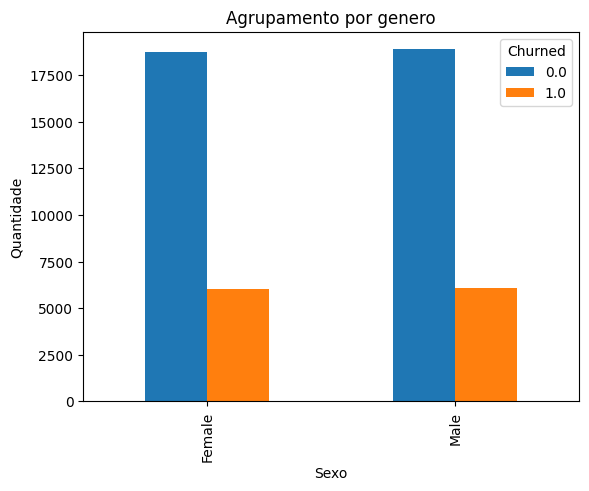

In [34]:
#Quantidade de assinaturas


grouped = streaming.groupby(['Gender', 'Churned']).count()['User_id']

grouped.unstack().plot(kind='bar', stacked=False)

plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.title('Agrupamento por genero')

plt.show()

#Etapa 02) Tratamento dos Dados (Data Preparation)

In [35]:
# 1. Substituir valores “NaN” por 0 Colunas → Time_on_platform,
# Num_streaming_services, Churned, Avg_rating, Devices_connected

streaming['Time_on_platform'].fillna(0, inplace=True)
streaming['Num_streaming_services'].fillna(0, inplace=True)
streaming['Churned'].fillna(0, inplace=True)
streaming['Avg_rating'].fillna(0, inplace=True)
streaming['Devices_connected'].fillna(0, inplace=True)


In [36]:
# 2. Dropar linhas nulas nas colunas Gender, Subscription_type e Age

streaming.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)


In [38]:
#Proporção de valores nulos
print('--------------------Valores nulos-----------------------\n')
display(streaming.isnull().mean()*100)
print('-------------------Data shape-------------------\n')
display(streaming.shape)

--------------------Valores nulos-----------------------



Age                       0.0
Gender                    0.0
Time_on_platform          0.0
Devices_connected         0.0
Subscription_type         0.0
Num_streaming_services    0.0
Num_active_profiles       0.0
Avg_rating                0.0
Churned                   0.0
User_id                   0.0
dtype: float64

-------------------Data shape-------------------



(36515, 10)

In [39]:
# 3. Transformando valores churned 0 e 1 por No e Yes

streaming['Churned'].replace({0: 'No', 1: 'Yes'}, inplace=True)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [40]:
#4. Transformando valores floats em valores inteiros

streaming['Time_on_platform'] = streaming['Time_on_platform'].astype(int)
streaming['Age'] = streaming['Age'].astype(int)
streaming['Num_streaming_services'] = streaming['Num_streaming_services'].astype(int)
streaming['Avg_rating'] = streaming['Avg_rating'].astype(int)
streaming['Devices_connected'] = streaming['Devices_connected'].astype(int)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


Text(0.5, 1.0, 'Foi Churned')

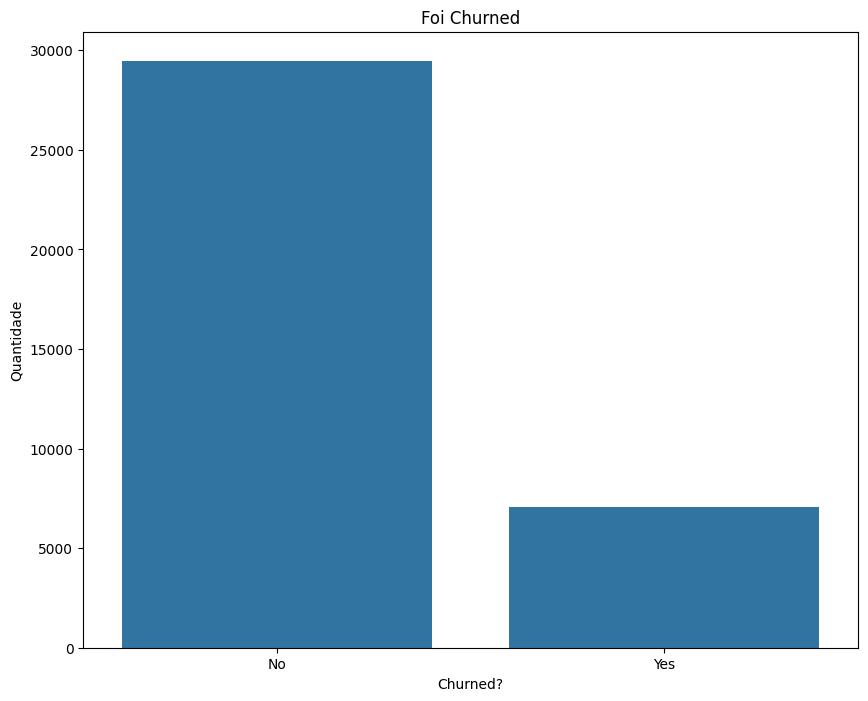

In [41]:
#Quantidade de Churned

plt.figure(figsize=[10,8])
sns.countplot(x='Churned', data=streaming)
plt.ylabel('Quantidade')
plt.xlabel('Churned?')
plt.title('Foi Churned')

Text(0.5, 1.0, 'Foi Churned')

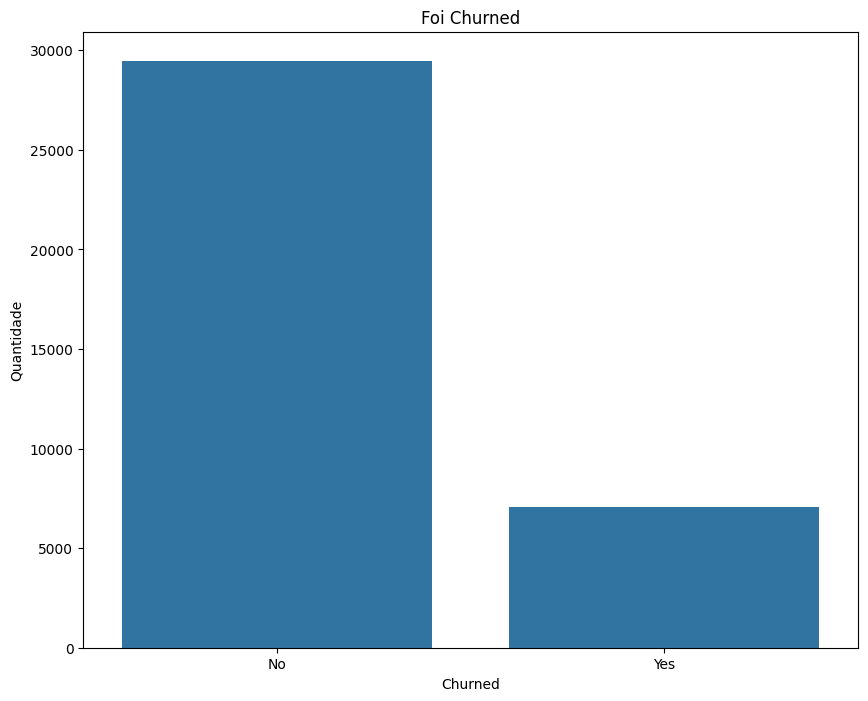

In [44]:
#Quantidade de Churned

plt.figure(figsize=[10,8])
sns.countplot(x='Churned', data=streaming)
plt.ylabel('Quantidade')
plt.xlabel('Churned')
plt.title('Foi Churned')

#Etapa 03) Modelagem dos Dados - Regressão Logística

In [45]:
# a. Definir variáveis X e y para o modelo

X = streaming.drop(['User_id', 'Churned'], axis=1)

y = streaming[['Churned']]

In [46]:
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

In [47]:
#Convertendo variaveis objeto em numerica
le = LabelEncoder()
streaming['Gender'] = le.fit_transform(streaming['Gender'])
streaming['Subscription_type'] = le.fit_transform(streaming['Subscription_type'])
streaming['Churned'] = le.fit_transform(streaming['Churned'])
streaming['User_id'] = le.fit_transform(streaming['User_id'])

In [48]:
X = pd.get_dummies(X)

In [49]:
#Instantiate a Min-Max scaling object
scaler = MinMaxScaler()

In [50]:
# b. Realizar o .fit do modelo
X = pd.DataFrame(scaler.fit_transform(X))

In [51]:
#c. Separar em train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [52]:
#d. Realizar a modelagem
model = LogisticRegression()
lr = model.fit(X_train, y_train)

In [53]:
#Fazendo previsões no conjunto de teste
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
#Armazenando as previsões e os melhores hiperparâmetros
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
17778,0.686275,0.377783,0.4,0.0,1.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
1487,0.215686,0.129695,0.0,0.0,0.75,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0
19977,0.039216,0.000000,0.4,0.0,0.75,0.4,0.0,1.0,0.0,0.0,1.0,NaN,0
24351,0.235294,0.000000,0.0,0.0,0.50,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
9054,0.117647,0.000000,0.0,0.0,0.00,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19206,0.666667,0.000000,0.0,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0
30285,0.176471,0.059938,0.0,0.5,0.00,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0
29792,0.862745,0.877383,0.2,0.0,0.50,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
26165,0.215686,0.404042,0.8,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0


In [56]:
#Previsão no conjunto de teste

y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Projetado')

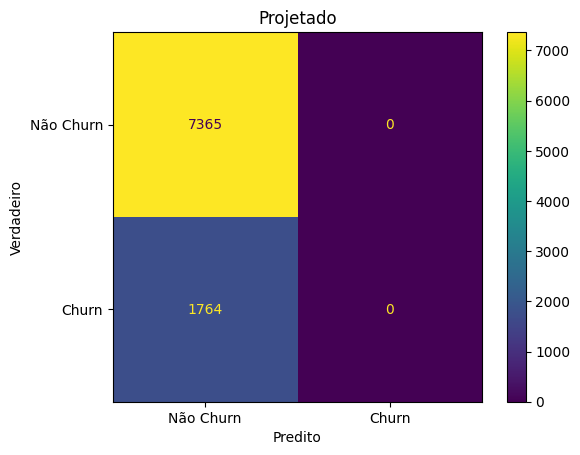

In [57]:
#e. Plotar matrix confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

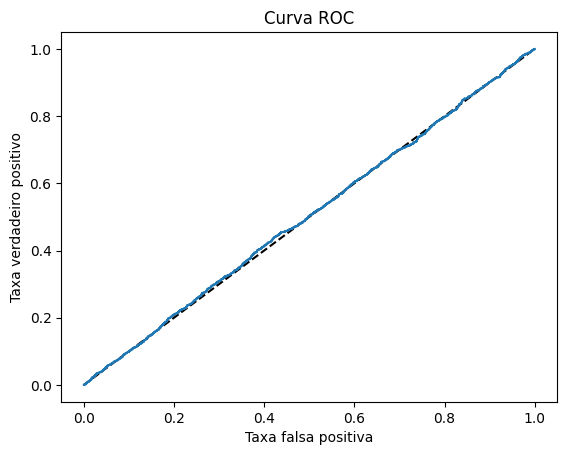

In [58]:
#Predizendo probabilidade: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

#Gerando Valores ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [59]:
#f. Printar métricas

print('Abaixo estão os resultados de treino e teste \n' )

print(f'Acurácia de (Treino): {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia de (Teste): {accuracy_score(y_test, lr.predict(X_test))}\n')
print('--------------------Acurácia-----------------')
print(f'Acurácia Balanceada de (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada de (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}\n')
print('--------------------Acurácia Balanceada-----------------')
print(f'Precision de (Treino): {precision_score(y_train, lr.predict(X_train))}')
print(f'Precision de (Teste): {precision_score(y_test, lr.predict(X_test))}\n')
print('--------------------Recall-----------------')
print(f'Recall de (Treino): {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall de (Teste): {recall_score(y_test, lr.predict(X_test))}\n')
print('--------------------F1-Score-----------------')
print(f'F1-Score de (Treino): {f1_score(y_train, lr.predict(X_train))}')
print(f'F1-Score de (Teste): {f1_score(y_test, lr.predict(X_test))}\n')
print('--------------------ROCAUC-----------------')
print(f'ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

Abaixo estão os resultados de treino e teste 

Acurácia de (Treino): 0.8067625794201416
Acurácia de (Teste): 0.8067696352283931

--------------------Acurácia-----------------
Acurácia Balanceada de (Treino): 0.5
Acurácia Balanceada de (Teste): 0.5

--------------------Acurácia Balanceada-----------------
Precision de (Treino): 0.0
Precision de (Teste): 0.0

--------------------Recall-----------------
Recall de (Treino): 0.0
Recall de (Teste): 0.0

--------------------F1-Score-----------------
F1-Score de (Treino): 0.0
F1-Score de (Teste): 0.0

--------------------ROCAUC-----------------
ROCAUC (Treino): 0.5123273276601912
ROCAUC (Teste): 0.5025080319523147


# Etapa 05) Modelagem dos Dados - Random Forest


In [63]:
#d. Realizar a modelagem

rf =  RandomForestClassifier()

In [64]:
#b. Realizar o .fit do modelo

rf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
#Fazendo previsões no conjunto de teste
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# Armazenando as previsões e os melhores hiperparâmetros
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
17778,0.686275,0.377783,0.4,0.0,1.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
1487,0.215686,0.129695,0.0,0.0,0.75,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0
19977,0.039216,0.000000,0.4,0.0,0.75,0.4,0.0,1.0,0.0,0.0,1.0,NaN,0
24351,0.235294,0.000000,0.0,0.0,0.50,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
9054,0.117647,0.000000,0.0,0.0,0.00,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19206,0.666667,0.000000,0.0,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,1
30285,0.176471,0.059938,0.0,0.5,0.00,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0
29792,0.862745,0.877383,0.2,0.0,0.50,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
26165,0.215686,0.404042,0.8,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

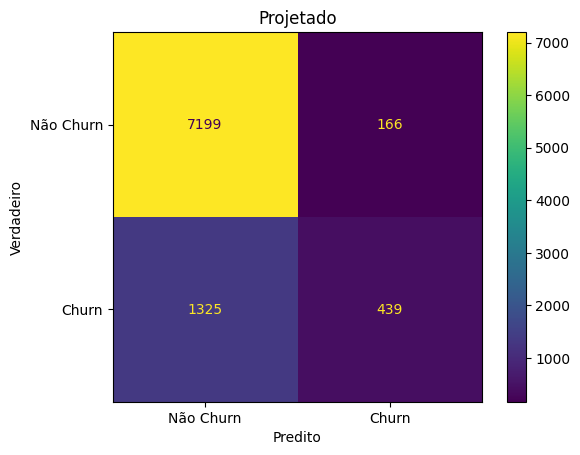

In [68]:
#Previsão no conjunto de teste
print('--------------------Previsão-----------------\n')
y_pred = rf.predict(X_test)

# Crie a matriz de confusão e a exiba
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

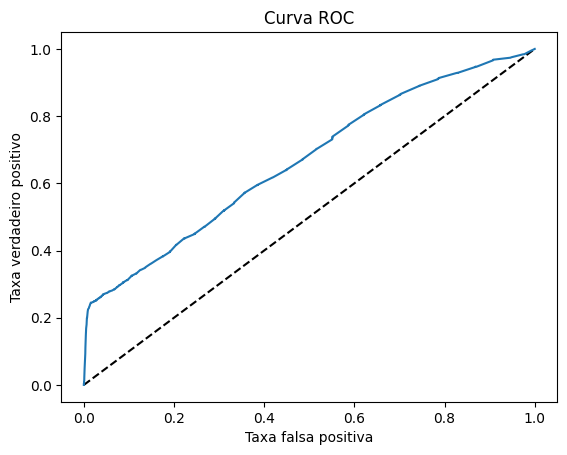

In [69]:
#Predizendo probabilidade: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

#Gerando Valores ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot Curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [70]:
# f. Printar métricas

print('Abaixo estão os resultados de treino e teste \n' )

print('--------------------Acurácia-----------------')
print(f'Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}\n')

print('--------------------Acurácia Balanceada-----------------')
print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}\n')

print('--------------------Precision-----------------')
print(f'Precision (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf.predict(X_test))}\n')

print('--------------------Recall-----------------')
print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}\n')

print('--------------------F1-Score -----------------')
print(f'F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}\n')

print('--------------------ROCAUC-----------------')
print(f'ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')

Abaixo estão os resultados de treino e teste 

--------------------Acurácia-----------------
Acurácia (Treino): 0.9943036588037684
Acurácia (Teste): 0.8366743345382845

--------------------Acurácia Balanceada-----------------
Acurácia Balanceada (Treino): 0.9887096506023428
Acurácia Balanceada (Teste): 0.6131635885854682

--------------------Precision-----------------
Precision (Treino): 0.9908256880733946
Precision (Teste): 0.7256198347107438

--------------------Recall-----------------
Recall (Treino): 0.9795918367346939
Recall (Teste): 0.24886621315192745

--------------------F1-Score -----------------
F1-Score (Treino): 0.9851767388825542
F1-Score (Teste): 0.3706205149852258

--------------------ROCAUC-----------------
ROCAUC (Treino): 0.9997180158083571
ROCAUC (Teste): 0.6654219642145159


In [71]:
# a. Realizar a montagem do grid search
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [72]:
#Fazendo treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [73]:
dict = grid_search.best_estimator_.get_params()

In [74]:
# c. Realizar o Tunning

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

Text(0.5, 1.0, 'Projetado')

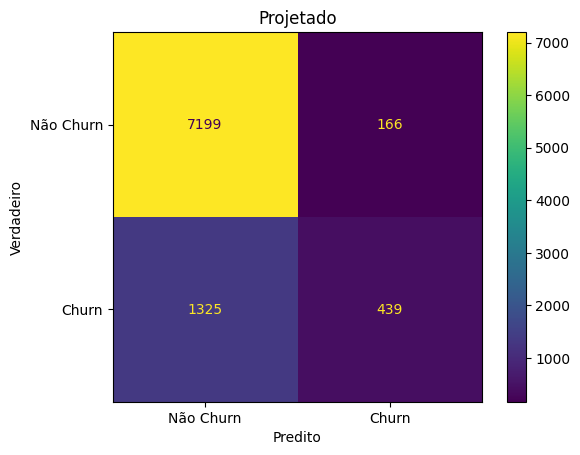

In [75]:
# e. Plotar matrix confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

#Etapa 04) Modelagem dos Dados - Tunning


In [76]:
# a. Definir variáveis X e y para o modelo
X = streaming.drop(['User_id', 'Churned'], axis=1)

y = streaming[['Churned']]

In [81]:
# b. Realizar o .fit do modelo

rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [78]:
#c. Separar em train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [82]:
#d. Realizar a modelagem
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
4461,19,1,8723,0,0,4,5,3,0,0
37368,45,0,8611,1,0,0,4,3,1,0
55967,48,0,8707,2,0,0,4,3,0,0
38622,45,1,0,0,0,0,2,1,1,0
74916,51,0,2432,0,0,0,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...
39401,18,0,470,4,2,0,5,4,0,0
5824,59,0,8349,0,2,0,3,0,0,0
65724,27,1,3102,0,1,0,4,4,0,0
64801,55,1,4170,1,0,0,4,1,0,0


In [85]:
#Previsão no conjunto de teste

y_pred = rf_tunned.predict(X_test)

Text(0.5, 1.0, 'Projetado')

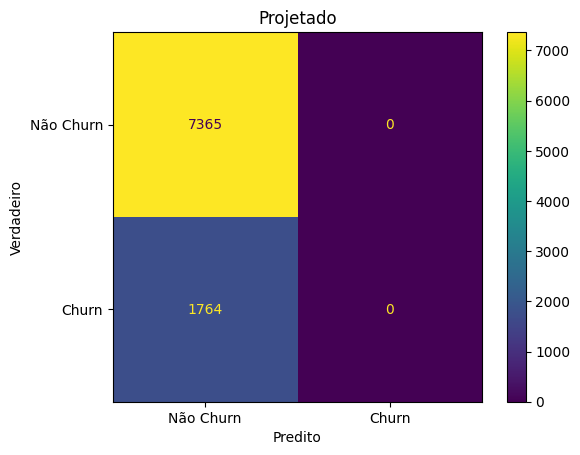

In [86]:
#e. Plotar matrix confusão

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

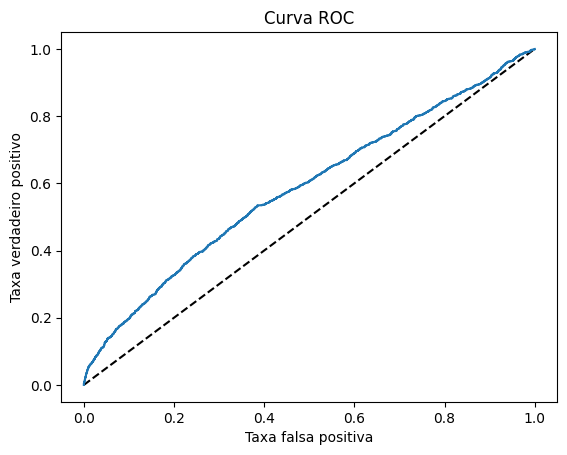

In [87]:
#Predizendo probabilidade: y_pred_prob
y_pred_prob = rf_tunned.predict_proba(X_test)[:,1]

#Gerando Valores ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot Curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [88]:
#f. Printar métricas

print('Abaixo estão os resultados de treino e teste \n' )

print('--------------------Acurácia-----------------')
print(f'Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}\n')

print('--------------------Acurácia Balanceada-----------------')
print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}\n')
print('--------------------Precision-----------------')
print(f'Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}\n')
print('--------------------Recall-----------------')
print(f'Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}\n')
print('--------------------F1-Score-----------------')
print(f'F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}')
print(f'F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}\n')
print('--------------------ROCAUC-----------------')
print(f'ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}')

Abaixo estão os resultados de treino e teste 

--------------------Acurácia-----------------
Acurácia (Treino): 0.8080040896808588
Acurácia (Teste): 0.8067696352283931

--------------------Acurácia Balanceada-----------------
Acurácia Balanceada (Treino): 0.5032123960695389
Acurácia Balanceada (Teste): 0.5

--------------------Precision-----------------
Precision (Treino): 1.0
Precision (Teste): 0.0

--------------------Recall-----------------
Recall (Treino): 0.006424792139077854
Recall (Teste): 0.0

--------------------F1-Score-----------------
F1-Score (Treino): 0.012767555388659407
F1-Score (Teste): 0.0

--------------------ROCAUC-----------------
ROCAUC (Treino): 0.8954394962676139
ROCAUC (Teste): 0.5858642642393006
